# Long Short Term Memory [LSTM]

### Importing the necessary libraries

In [24]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

## Importing Dataset

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')

In [3]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [4]:
data.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


## Data Preprocessing and Visulaisation

In [5]:
data['Date'] = pd.to_datetime(data['Date'])
df = data.sort_values(by='Date')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [6]:
df.reset_index(inplace=True)

In [7]:
df.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


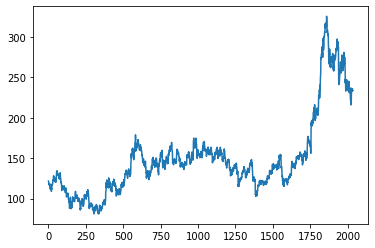

In [8]:
plt.plot(df['Close'])

In [9]:
df1 = df['Close']

In [10]:
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

## Training and Testing Dataset

In [11]:
training_size = int(len(df1)*0.70)
test_size = len(df1) - training_size


train_data = df1[0:training_size,:]
test_data = df1[training_size:len(df1), :1]

In [12]:
training_size, test_size

(1424, 611)

In [13]:
def datasetCrtd(dataset, time_step=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step), 0]
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])

  return np.array(dataX), np.array(dataY)

In [14]:
time_step = 100
X_train, y_train = datasetCrtd(train_data, time_step)
X_test, ytest = datasetCrtd(test_data, time_step)

In [15]:
print(X_train.shape), print(y_train.shape)

(1323, 100)
(1323,)


(None, None)

## Model Building

In [16]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [18]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.fit(X_train, y_train, validation_split=0.1, epochs=60, batch_size=64, verbose=1)

Epoch 1/60
19/19 [==============================] - 7s 229ms/step - loss: 0.0112 - val_loss: 0.0013
Epoch 2/60
19/19 [==============================] - 3s 184ms/step - loss: 0.0018 - val_loss: 0.0017
Epoch 3/60
19/19 [==============================] - 3s 186ms/step - loss: 0.0010 - val_loss: 0.0013
Epoch 4/60
19/19 [==============================] - 4s 190ms/step - loss: 9.5663e-04 - val_loss: 0.0012
Epoch 5/60
19/19 [==============================] - 3s 136ms/step - loss: 8.3784e-04 - val_loss: 0.0011
Epoch 6/60
19/19 [==============================] - 3s 167ms/step - loss: 8.1935e-04 - val_loss: 0.0011
Epoch 7/60
19/19 [==============================] - 4s 213ms/step - loss: 8.0450e-04 - val_loss: 0.0011
Epoch 8/60
19/19 [==============================] - 3s 150ms/step - loss: 7.6110e-04 - val_loss: 9.9232e-04
Epoch 9/60
19/19 [==============================] - 3s 164ms/step - loss: 7.7604e-04 - val_loss: 9.4461e-04
Epoch 10/60
19/19 [==============================] - 3s 164ms/step -

In [20]:
test_predict = model.predict(X_test)

In [21]:
# transform to original test set
test_predict1 = scaler.inverse_transform(test_predict)

In [22]:
test_predict1

array([[143.96233 ],
       [144.07039 ],
       [142.95555 ],
       [139.82224 ],
       [138.20874 ],
       [138.20654 ],
       [140.08252 ],
       [141.90619 ],
       [141.7717  ],
       [140.67711 ],
       [140.19804 ],
       [141.89497 ],
       [143.10847 ],
       [144.9108  ],
       [147.24893 ],
       [144.3393  ],
       [141.16518 ],
       [141.27911 ],
       [142.8693  ],
       [149.23618 ],
       [153.9033  ],
       [154.89479 ],
       [153.91695 ],
       [151.14124 ],
       [151.63977 ],
       [152.40938 ],
       [153.31917 ],
       [155.15677 ],
       [155.4666  ],
       [154.82697 ],
       [155.01596 ],
       [153.67421 ],
       [149.94023 ],
       [143.54257 ],
       [140.38017 ],
       [140.39844 ],
       [141.20088 ],
       [139.94133 ],
       [136.51065 ],
       [131.87544 ],
       [129.4164  ],
       [129.02214 ],
       [127.313065],
       [126.67682 ],
       [124.40358 ],
       [121.36647 ],
       [120.8871  ],
       [121.0

## Error Evaluation

In [23]:
import math
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metrics
math.sqrt(mean_squared_error(ytest, test_predict))

0.022210034029766023